In [1]:
!pip install sklearn

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x000002086E4DA780>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/sklearn/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x000002086E4DA630>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed')': /simple/sklearn/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x000002086E4DA710>: Failed to establish a new connection: [Errno 11002] getaddrinfo failed')': /simple/sklearn/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=No

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

In [6]:
!pip install -U scikit-learn

You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
# Generate Dataset
X,Y = make_regression(n_samples=400,n_features=1,n_informative=1,noise=1.8,random_state=11)


Y = Y.reshape((-1,1))
print(X.shape)
print(Y.shape)

(400, 1)
(400, 1)


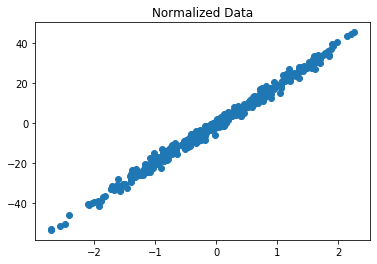

In [10]:
# Normalize
X = (X-X.mean())/X.std()

# Visualize
plt.figure()
plt.scatter(X,Y)
plt.title("Normalized Data")
plt.show()

In [11]:
ones = np.ones((X.shape[0],1))
X_ = np.hstack((X,ones))
print(X_.shape)
print(X_[:5,:])

(400, 2)
[[-0.86881353  1.        ]
 [ 1.04796658  1.        ]
 [-0.2019676   1.        ]
 [-0.34017061  1.        ]
 [ 0.13317349  1.        ]]


In [12]:
def predict(X,theta):
    return np.dot(X,theta)

def getThetaClosedForm(X,Y):
    
    Y = np.mat(Y)
    firstPart = np.dot(X.T,X)
    secondPart = np.dot(X.T,Y)
    
    theta = np.linalg.pinv(firstPart)*secondPart
    return theta

In [13]:
theta = getThetaClosedForm(X_,Y)
print(theta)

[[19.45877082]
 [-0.29187892]]


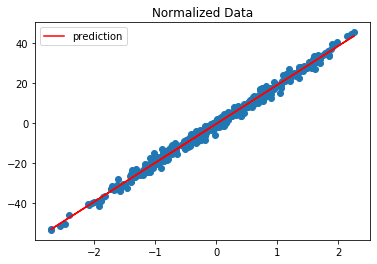

In [14]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X,predict(X_,theta),color='red',label="prediction")
plt.title("Normalized Data")
plt.legend()
plt.show()